In [ ]:
import sys
sys.path.append("/ysinha/projects/ONN")  # or wherever onn.py is located

import onn

import time
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from torch.distributions.normal import Normal

In [ ]:
fig4ai = np.load("/ysinha/projects/ONN/output/.npz")
alphas = accuracy_vs_alpha['alphas']
test_acc_exact = accuracy_vs_alpha['test_acc_exact']
test_acc_approx = accuracy_vs_alpha['test_acc_approx']

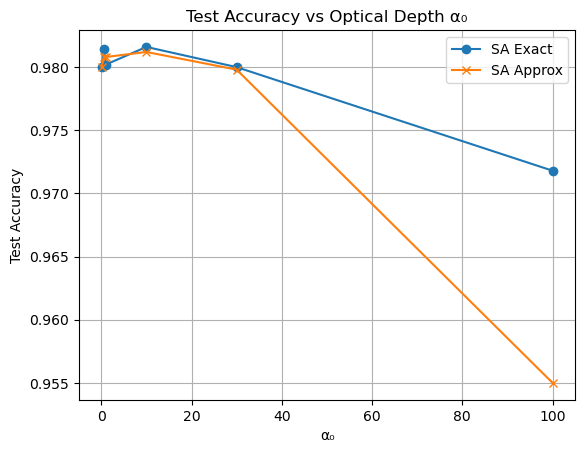

In [ ]:
plt.figure()
plt.plot(range(onn.EPOCHS), accs_ann, marker='o', label="ANN")
plt.plot(range(onn.EPOCHS), accs_onn_exact, marker='x', label="ONN Exact")
plt.plot(range(onn.EPOCHS), accs_onn_approx, marker='s', label="ONN Approx")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Epochs")
plt.legend()
plt.grid(True)
plt.savefig("/ysinha/projects/ONN/figs/fig4ai_normalized.png")

In [ ]:
fig3b = np.load("/ysinha/projects/ONN/output/fig3b.npz")
epochs = fig3b['epochs']
density_logs_exact = fig3b['density_logs_exact']
density_logs_approx = fig3b['density_logs_approx']

#divide each row by the sum of that row
density_logs_exact = density_logs_exact / density_logs_exact.sum(axis=1, keepdims=True)
density_logs_approx = density_logs_approx / density_logs_approx.sum(axis=1, keepdims=True)

In [23]:
density_logs_exact.shape

(50, 100)

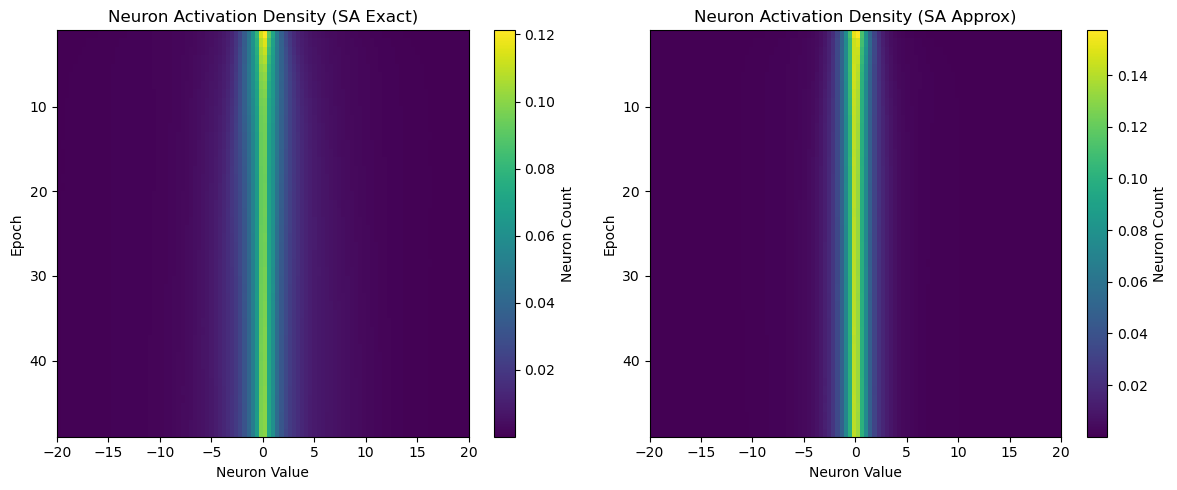

In [25]:
# Save plot 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(density_logs_exact[1:49], aspect='auto', origin='upper', extent=[-20, 20, 49, 1])
plt.colorbar(label="Neuron Count")
plt.xlabel("Neuron Value")
plt.ylabel("Epoch")
plt.title("Neuron Activation Density (SA Exact)")
plt.subplot(1, 2, 2)
plt.imshow(density_logs_approx[1:49], aspect='auto', origin='upper', extent=[-20, 20, 49, 1])
plt.colorbar(label="Neuron Count")
plt.xlabel("Neuron Value")
plt.ylabel("Epoch")
plt.title("Neuron Activation Density (SA Approx)")
plt.tight_layout()

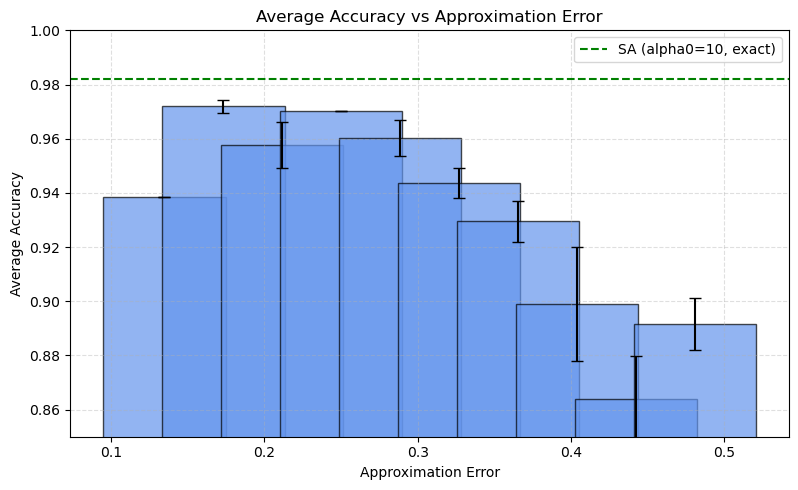

In [ ]:
from scipy.stats import binned_statistic
import numpy as np
import matplotlib.pyplot as plt
fig3d = np.load("/ysinha/projects/ONN/output/fig3d.npz")
approx_errors = fig3d['approx_errors']
accs = fig3d['accs']
acc_onn_exact = fig3d['acc_onn_exact']

# --- a) Bin the similarities and compute avg accuracies and error bars ---
num_bins = 13
bins = np.linspace(0, 0.5, num_bins + 1)

# Mean accuracy per bin
bin_means, bin_edges, _ = binned_statistic(approx_errors, accs, statistic='mean', bins=bins)

# Standard error per bin
bin_stds, _, _ = binned_statistic(approx_errors, accs, statistic='std', bins=bins)
bin_counts, _, _ = binned_statistic(approx_errors, accs, statistic='count', bins=bins)
bin_sems = bin_stds / np.sqrt(bin_counts)

# Bin centers for plotting
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# --- b) Plot bar graph with error bars ---
plt.figure(figsize=(8, 5))
plt.bar(bin_centers, bin_means, width=0.08, yerr=bin_sems, capsize=4, align='center', alpha=0.7, color='cornflowerblue', edgecolor='k')
plt.axhline(y=acc_onn_exact, color='g', linestyle='--', label='SA (alpha0=10, exact)')
plt.xlabel('Approximation Error')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy vs Approximation Error')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend()
plt.ylim(0.85,1)
plt.savefig("/ysinha/projects/ONN/figs/fig3d.png")